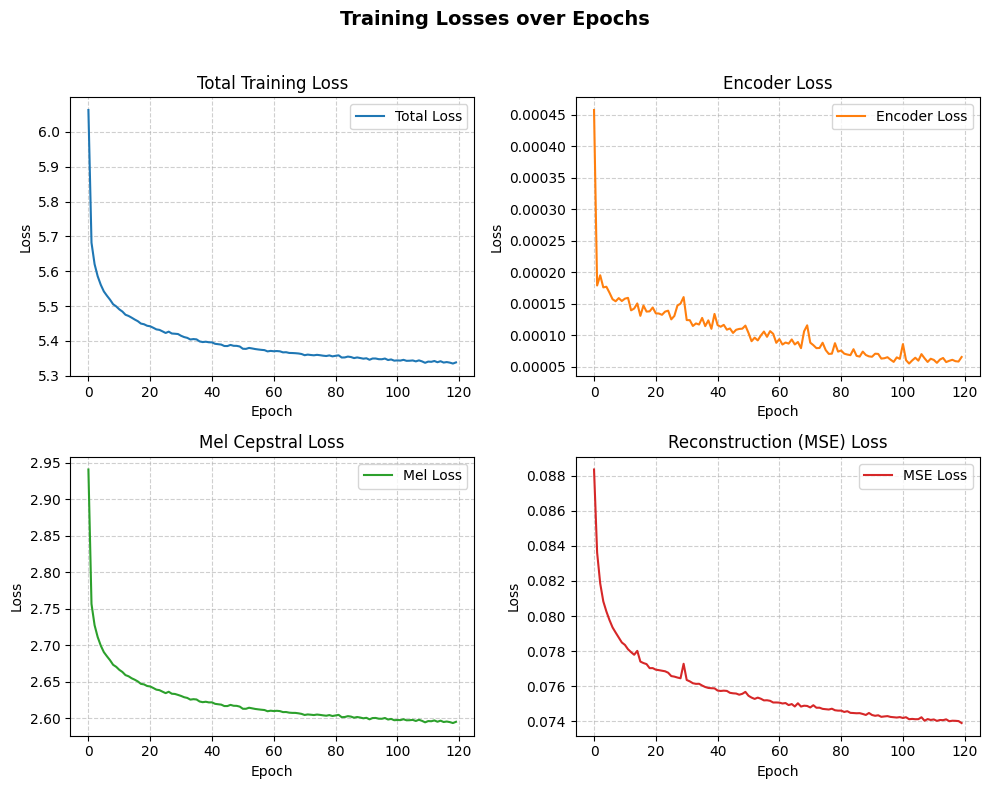

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load losses
train_loss = np.load('/home/matthew-fynn/Desktop/DL/_SSL_Model/trained_SSL_model_pcg2_1D_a10b2m2/train_total.npy')
enc_loss   = np.load('/home/matthew-fynn/Desktop/DL/_SSL_Model/trained_SSL_model_pcg2_1D_a10b2m2/train_enc.npy')
mel_loss   = np.load('/home/matthew-fynn/Desktop/DL/_SSL_Model/trained_SSL_model_pcg2_1D_a10b2m2/train_mel.npy')
mse_loss   = np.load('/home/matthew-fynn/Desktop/DL/_SSL_Model/trained_SSL_model_pcg2_1D_a10b2m2/train_mse.npy')

# Create figure and axes (2×2 grid)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot each loss
axs[0, 0].plot(train_loss, label='Total Loss', color='tab:blue')
axs[0, 0].set_title('Total Training Loss')

axs[0, 1].plot(enc_loss, label='Encoder Loss', color='tab:orange')
axs[0, 1].set_title('Encoder Loss')

axs[1, 0].plot(mel_loss, label='Mel Loss', color='tab:green')
axs[1, 0].set_title('Mel Cepstral Loss')

axs[1, 1].plot(mse_loss, label='MSE Loss', color='tab:red')
axs[1, 1].set_title('Reconstruction (MSE) Loss')

# Format all subplots
for ax in axs.flat:
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

# Adjust layout
plt.suptitle('Training Losses over Epochs', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


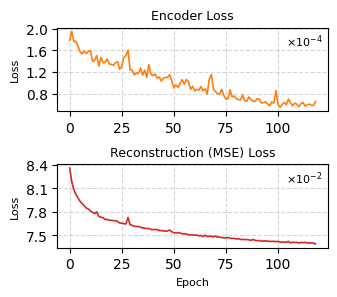

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

# Load
enc_loss = np.load('/home/matthew-fynn/Desktop/DL/_SSL_Model/trained_SSL_model_pcg2_1D_a10b2m2/train_enc.npy')
mel_loss = np.load('/home/matthew-fynn/Desktop/DL/_SSL_Model/trained_SSL_model_pcg2_1D_a10b2m2/train_mel.npy')
mse_loss = np.load('/home/matthew-fynn/Desktop/DL/_SSL_Model/trained_SSL_model_pcg2_1D_a10b2m2/train_mse.npy')

enc_loss = enc_loss[1::]
mel_loss = mel_loss[1::]
mse_loss = mse_loss[1::]


fig, axs = plt.subplots(2, 1, figsize=(3.4, 3.0))

# ---- Encoder (×1e4) -> ticks like 4.0, 3.0, 2.0 ----
y_enc = enc_loss * 1e4
axs[0].plot(y_enc, color='tab:orange', lw=1.2)
axs[0].set_title('Encoder Loss', fontsize=9)
axs[0].set_ylabel('Loss', fontsize=8)
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[0].yaxis.set_major_locator(MaxNLocator(nbins=4))
axs[0].grid(True, linestyle='--', alpha=0.5)
axs[0].text(0.98, 0.94, r'$\times10^{-4}$', transform=axs[0].transAxes,
            fontsize=8, ha='right', va='top')

# # ---- Mel (natural scale) ----
# axs[1].plot(mel_loss, color='tab:green', lw=1.2)
# axs[1].set_title('Mel Cepstral Loss', fontsize=9)
# axs[1].set_ylabel('Loss', fontsize=8)
# axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# axs[1].yaxis.set_major_locator(MaxNLocator(nbins=4))
# axs[1].grid(True, linestyle='--', alpha=0.5)

# ---- MSE (×1e2) -> ticks like 8.5, 8.0, 7.5 ----
y_mse = mse_loss * 1e2
axs[1].plot(y_mse, color='tab:red', lw=1.2)
axs[1].set_title('Reconstruction (MSE) Loss', fontsize=9)
axs[1].set_xlabel('Epoch', fontsize=8)
axs[1].set_ylabel('Loss', fontsize=8)
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1].yaxis.set_major_locator(MaxNLocator(nbins=4))
axs[1].grid(True, linestyle='--', alpha=0.5)
axs[1].text(0.98, 0.94, r'$\times10^{-2}$', transform=axs[1].transAxes,
            fontsize=8, ha='right', va='top')

plt.tight_layout(pad=0.8)
plt.savefig('1Dlosses_v2.png', dpi=600, bbox_inches='tight')
plt.show()
